In [1]:
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import SGD
from keras.datasets import mnist
from keras.utils import np_utils

Using Theano backend.
WARNING (theano.sandbox.cuda): CUDA is installed, but device gpu is not available  (error: Unable to get the number of gpus available: unknown error)


In [2]:
batch_size = 128
nb_classes = 10
nb_epoch = 100

## Load MNIST dataset

In [3]:
(X_train_raw, Y_train_raw), (X_test_raw, Y_test_raw) = mnist.load_data()

### Reshape Data from image matrix to array & normalize


In [4]:
X_train = X_train_raw.reshape(X_train_raw.shape[0], X_train_raw.shape[1]*X_train_raw.shape[2]).astype('float32')
X_train /= 255.

X_test = X_test_raw.reshape(X_test_raw.shape[0], X_test_raw.shape[1]*X_test_raw.shape[2]).astype('float32')
X_test /= 255.

In [5]:
Y_train = np_utils.to_categorical(Y_train_raw)

Y_test = np_utils.to_categorical(Y_test_raw)

## Logistic Regression Model

In [6]:
model = Sequential()
model.add(Dense(output_dim=10, input_shape=(784,), init='normal', activation='softmax'))
model.compile(optimizer=SGD(lr=0.05), loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

____________________________________________________________________________________________________
Layer (type)                     Output Shape          Param #     Connected to                     
dense_1 (Dense)                  (None, 10)            7850        dense_input_1[0][0]              
Total params: 7850
____________________________________________________________________________________________________


## Train

In [7]:
history = model.fit(X_train, Y_train, nb_epoch=nb_epoch, batch_size=batch_size, validation_split=0.2, verbose=1)

Train on 48000 samples, validate on 12000 samples
Epoch 1/100
48000/48000 [==============================] - 0s - loss: 0.7782 - acc: 0.8177 - val_loss: 0.4723 - val_acc: 0.8848
Epoch 2/100
48000/48000 [==============================] - 0s - loss: 0.4609 - acc: 0.8788 - val_loss: 0.3957 - val_acc: 0.8995
Epoch 3/100
48000/48000 [==============================] - 0s - loss: 0.4076 - acc: 0.8895 - val_loss: 0.3656 - val_acc: 0.9033
Epoch 4/100
48000/48000 [==============================] - 0s - loss: 0.3807 - acc: 0.8956 - val_loss: 0.3477 - val_acc: 0.9069
Epoch 5/100
48000/48000 [==============================] - 0s - loss: 0.3640 - acc: 0.8994 - val_loss: 0.3355 - val_acc: 0.9101
Epoch 6/100
48000/48000 [==============================] - 0s - loss: 0.3519 - acc: 0.9031 - val_loss: 0.3269 - val_acc: 0.9105
Epoch 7/100
48000/48000 [==============================] - 0s - loss: 0.3427 - acc: 0.9041 - val_loss: 0.3207 - val_acc: 0.9117
Epoch 8/100
48000/48000 [=============================

## Evaluate

In [8]:
evaluation = model.evaluate(X_test, Y_test, verbose=1)
print('Summary: Loss over the test dataset: %.2f, Accuracy: %.2f' % (evaluation[0], evaluation[1]))

 8704/10000 [=========================>....] - ETA: 0sSummary: Loss over the test dataset: 0.27, Accuracy: 0.93


## Predict

In [9]:
test_predictions = model.predict(X_test)
test_prediction_ids = test_predictions.argmax(axis=1)

## Plot some predictions

In [10]:
from matplotlib import pyplot as plt
import numpy as np
def plots(ims, figsize=(12,6), rows=1, interp=False, titles=None):
    f = plt.figure(figsize=figsize)
    for i in range(len(ims)):
        sp = f.add_subplot(rows, len(ims)//rows, i+1)
        if titles is not None:
            sp.set_title(titles[i], fontsize=6)
        plt.imshow(ims[i], interpolation=None if interp else 'none')

In [11]:
n_view = 4

idx = np.random.permutation(range(0,len(X_test)))[:n_view]

imgs = X_test[idx,:].reshape(n_view, X_train_raw.shape[1], X_train_raw.shape[2])
titles = test_prediction_ids[idx]

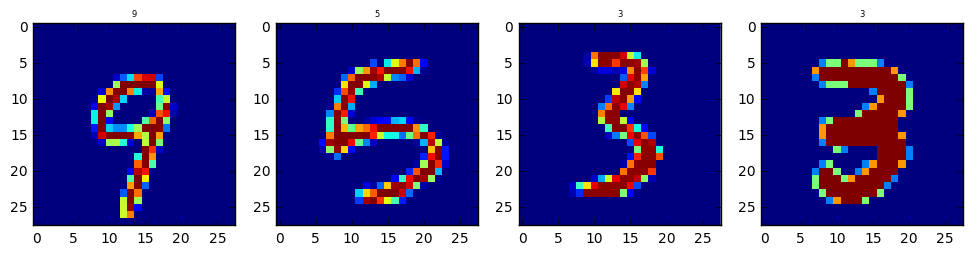

In [12]:
plots(imgs, titles=titles)
plt.show()